In [12]:
import os
from pathlib import Path
dir_path = Path(r"/Users/rabinatwayana/Rabina/CDE II/Wildfire Project/SAR-Burnt-Area-Mapping/")
if dir_path.exists():
    os.chdir(dir_path)
else:
    print("Directory does not exist! Please check the path.")
!pwd

/Users/rabinatwayana/Rabina/CDE II/Wildfire Project/SAR-Burnt-Area-Mapping


In [ ]:
import rasterio
from rasterio.windows import from_bounds
import geopandas as gpd
from shapely.geometry import box
import numpy as np
from utils import glcm_average, clip_image, compute_pca, compute_dglcm, compute_asc_desc_dglcm

In [15]:
pre_asc_image_path="../Asc_S1_Palisades/10_GLCM/S1A_asc_TC_subset_glcm_pre_32611.tif"
post_asc_image_path="../Asc_S1_Palisades/10_GLCM/S1A_asc_TC_subset_glcm_post_32611.tif"
pre_desc_image_path="../Desc_S1_Palisades/10_GLCM/S1A_desc_TC_subset_glcm_pre_32611.tif"
post_desc_image_path="../Desc_S1_Palisades/10_GLCM/S1A_desc_TC_subset_glcm_post_32611.tif"

pre_asc_avg_output_path="MachineLearning/input/glcm/01_avg/S1A_asc_glcm_pre_avg.tif"
post_asc_avg_output_path="MachineLearning/input/glcm/01_avg/S1A_asc_glcm_post_avg.tif"
pre_desc_avg_output_path="MachineLearning/input/glcm/01_avg/S1A_desc_glcm_pre_avg.tif"
post_desc_avg_output_path="MachineLearning/input/glcm/01_avg/S1A_desc_glcm_post_avg.tif"

glcm_average(pre_asc_image_path,pre_asc_avg_output_path)
glcm_average(post_asc_image_path,post_asc_avg_output_path)
glcm_average(pre_desc_image_path,pre_desc_avg_output_path)
glcm_average(post_desc_image_path,post_desc_avg_output_path)

Averaged raster saved as: MachineLearning/input/glcm/01_avg/S1A_asc_glcm_pre_avg.tif
Averaged raster saved as: MachineLearning/input/glcm/01_avg/S1A_asc_glcm_post_avg.tif
Averaged raster saved as: MachineLearning/input/glcm/01_avg/S1A_desc_glcm_pre_avg.tif
Averaged raster saved as: MachineLearning/input/glcm/01_avg/S1A_desc_glcm_post_avg.tif


In [16]:
minx, miny, maxx, maxy=337276.20835215, 3762751.49928493, 370706.59898943, 3781200.70468214
clip_extent = (minx, miny, maxx, maxy)

pre_asc_clip_output_path="MachineLearning/input/glcm/02_clip/S1A_asc_glcm_pre_avg_clip.tif"
post_asc_clip_output_path="MachineLearning/input/glcm/02_clip/S1A_asc_glcm_post_avg_clip.tif"
pre_desc_clip_output_path="MachineLearning/input/glcm/02_clip/S1A_desc_glcm_pre_avg_clip.tif"
post_desc_clip_output_path="MachineLearning/input/glcm/02_clip/S1A_desc_glcm_post_avg_clip.tif"

clip_image(pre_asc_avg_output_path,pre_asc_clip_output_path,clip_extent)
clip_image(post_asc_avg_output_path,post_asc_clip_output_path,clip_extent)
clip_image(pre_desc_avg_output_path,pre_desc_clip_output_path,clip_extent)
clip_image(post_desc_avg_output_path,post_desc_clip_output_path,clip_extent)

clip image saved into  MachineLearning/input/glcm/02_clip/S1A_asc_glcm_pre_avg_clip.tif
clip image saved into  MachineLearning/input/glcm/02_clip/S1A_asc_glcm_post_avg_clip.tif
clip image saved into  MachineLearning/input/glcm/02_clip/S1A_desc_glcm_pre_avg_clip.tif
clip image saved into  MachineLearning/input/glcm/02_clip/S1A_desc_glcm_post_avg_clip.tif


In [ ]:
output_asc_dGLCM_path="MachineLearning/input/glcm/03_dglcm/palisade_asc_dGLCM.tif"
output_desc_dGLCM_path="MachineLearning/input/glcm/03_dglcm/palisade_desc_dGLCM.tif"
compute_dglcm(pre_asc_clip_output_path,post_asc_clip_output_path,output_asc_dGLCM_path)
compute_dglcm(pre_desc_clip_output_path,post_desc_clip_output_path,output_desc_dGLCM_path)

Saved dglcm to MachineLearning/input/glcm/03_dglcm/palisade_asc_dGLCM.tif
Saved dglcm to MachineLearning/input/glcm/03_dglcm/palisade_desc_dGLCM.tif


In [ ]:
output_asc_desc_path="MachineLearning/input/glcm/03_dglcm/palisade_asc_desc_dGLCM.tif"
compute_asc_desc_dglcm(output_asc_dGLCM_path,output_desc_dGLCM_path,output_asc_desc_path)

Saved dglcm to MachineLearning/input/glcm/03_dglcm/palisade_asc_desc_dGLCM.tif


Number of principal components selected: 3


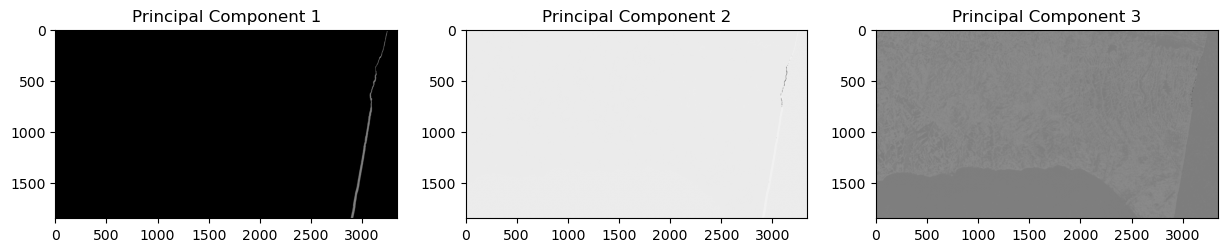

In [ ]:
output_pca_path="MachineLearning/input/glcm/04_pca/palisade_asc_desc_dGLCM_pca.tif"
compute_pca(output_asc_desc_path,output_pca_path)